In [1]:
!pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 3.2 MB/s eta 0:00:00
     ------------------------------------- 233.8/233.8 kB 14.0 MB/s eta 0:00:00


In [31]:
len(simulated_data_1[:-1])

199

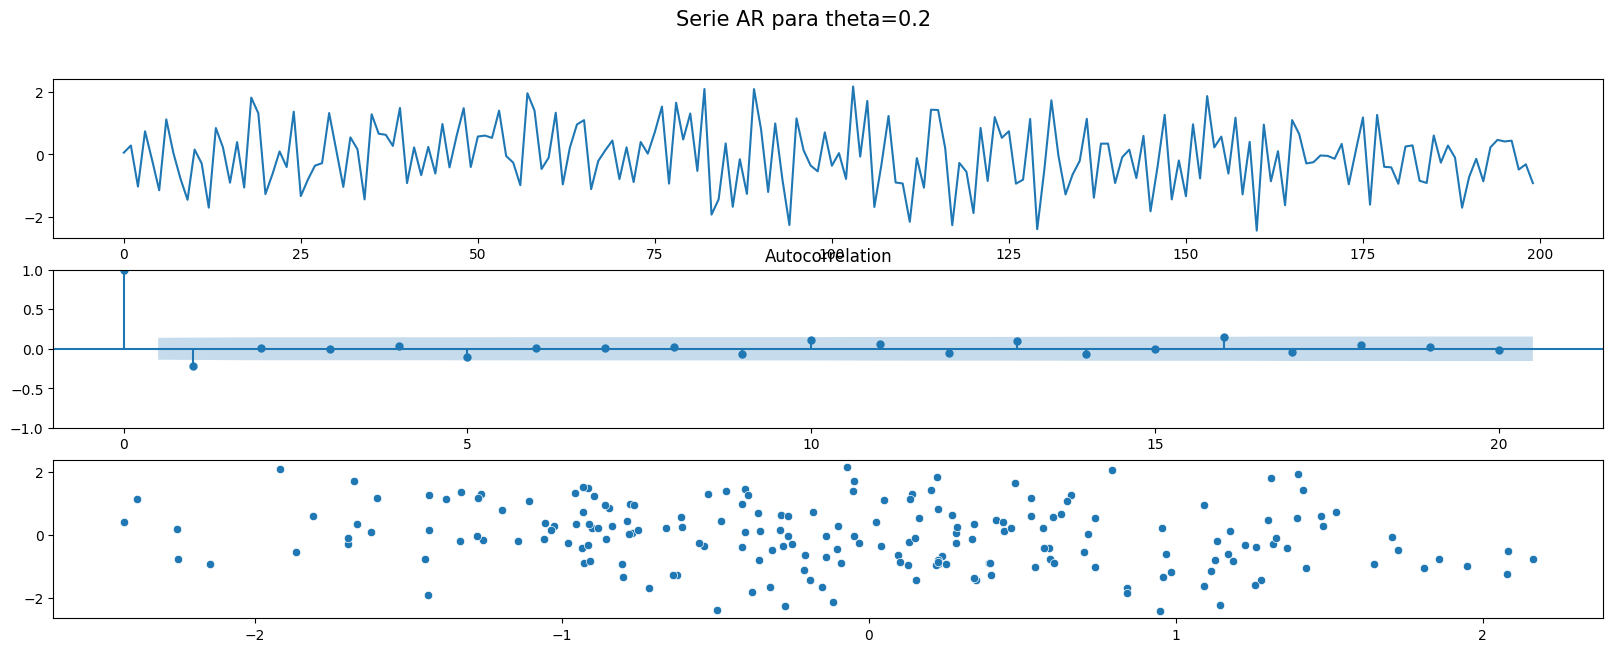

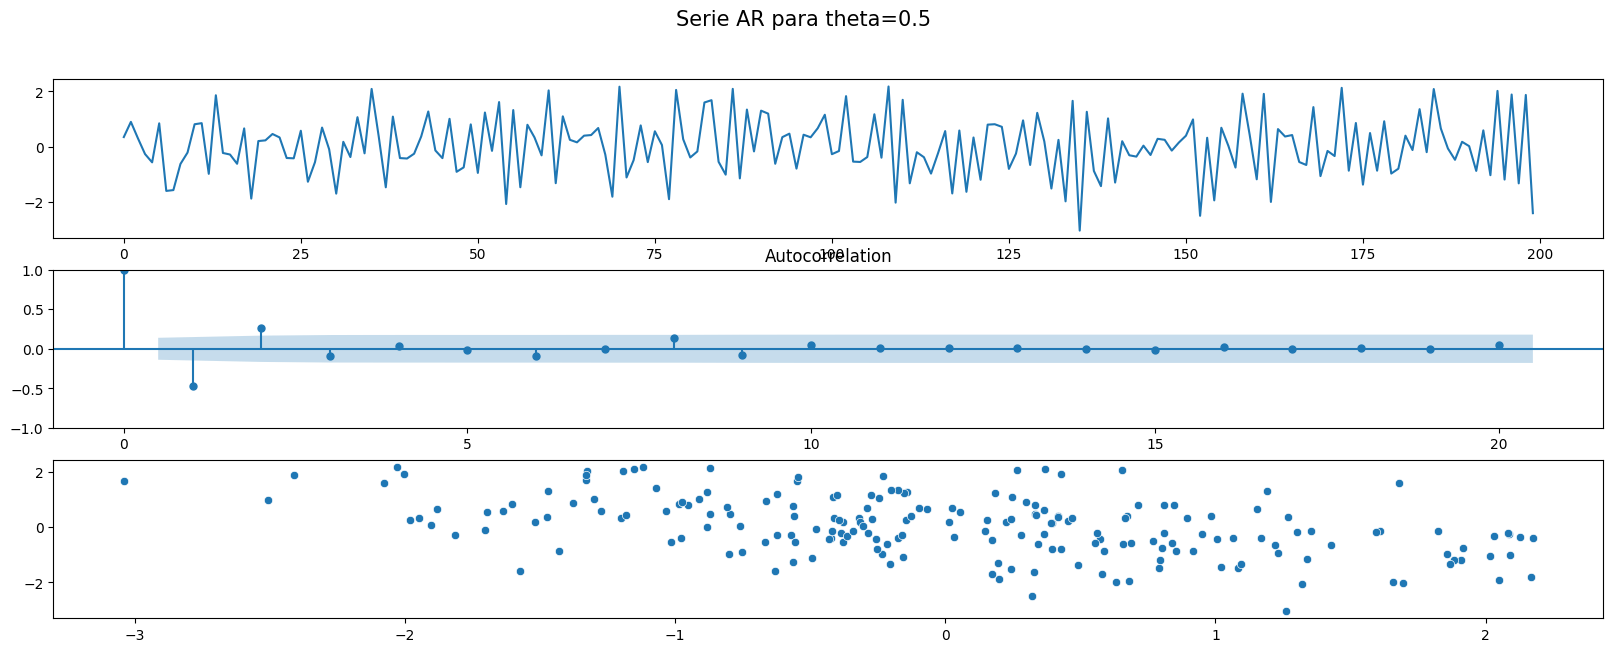

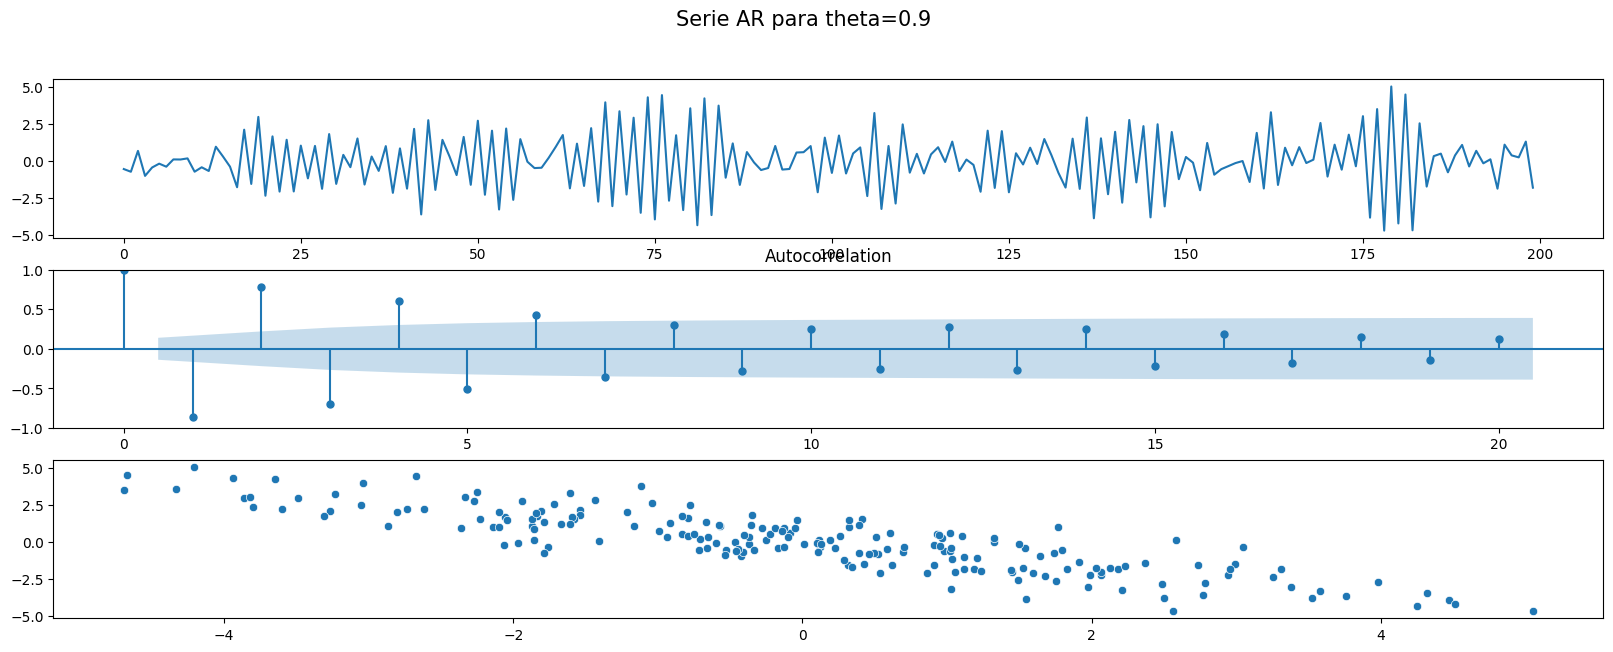

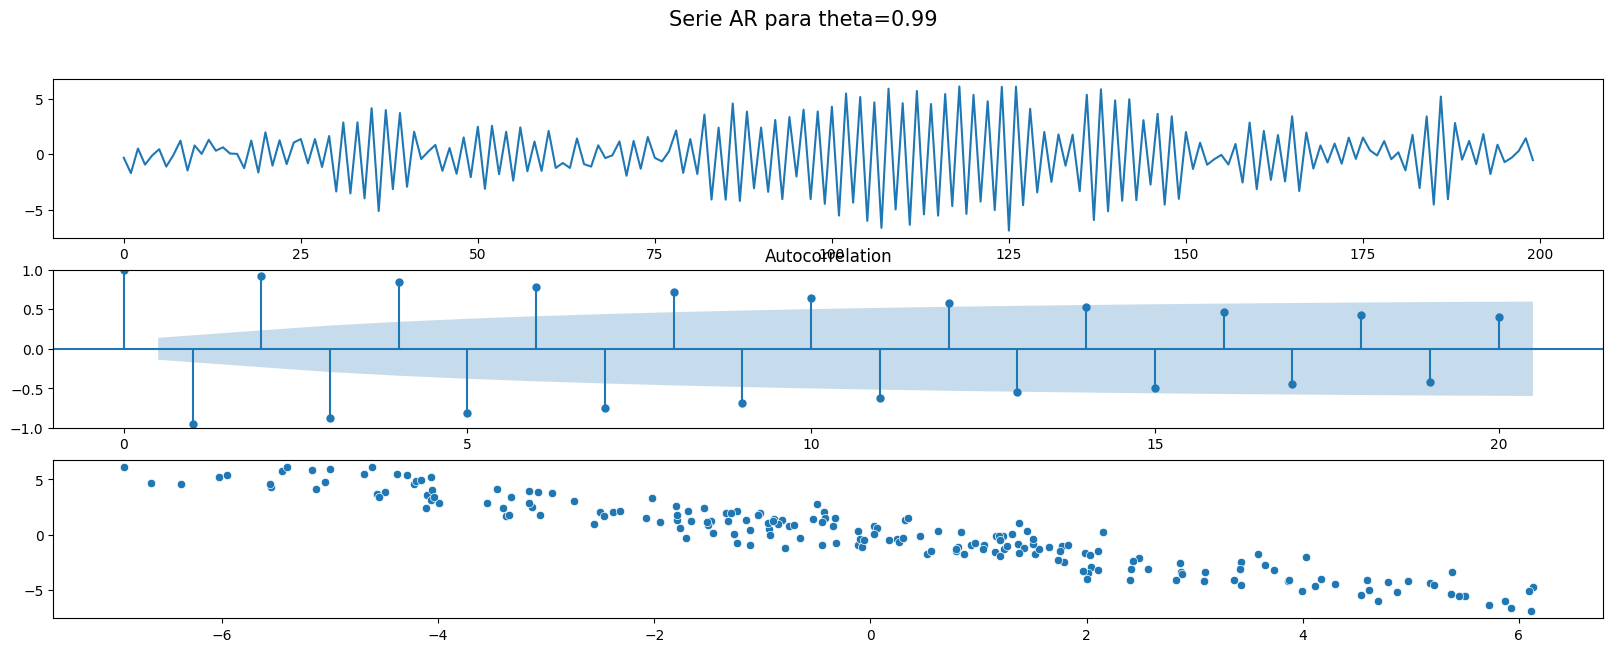

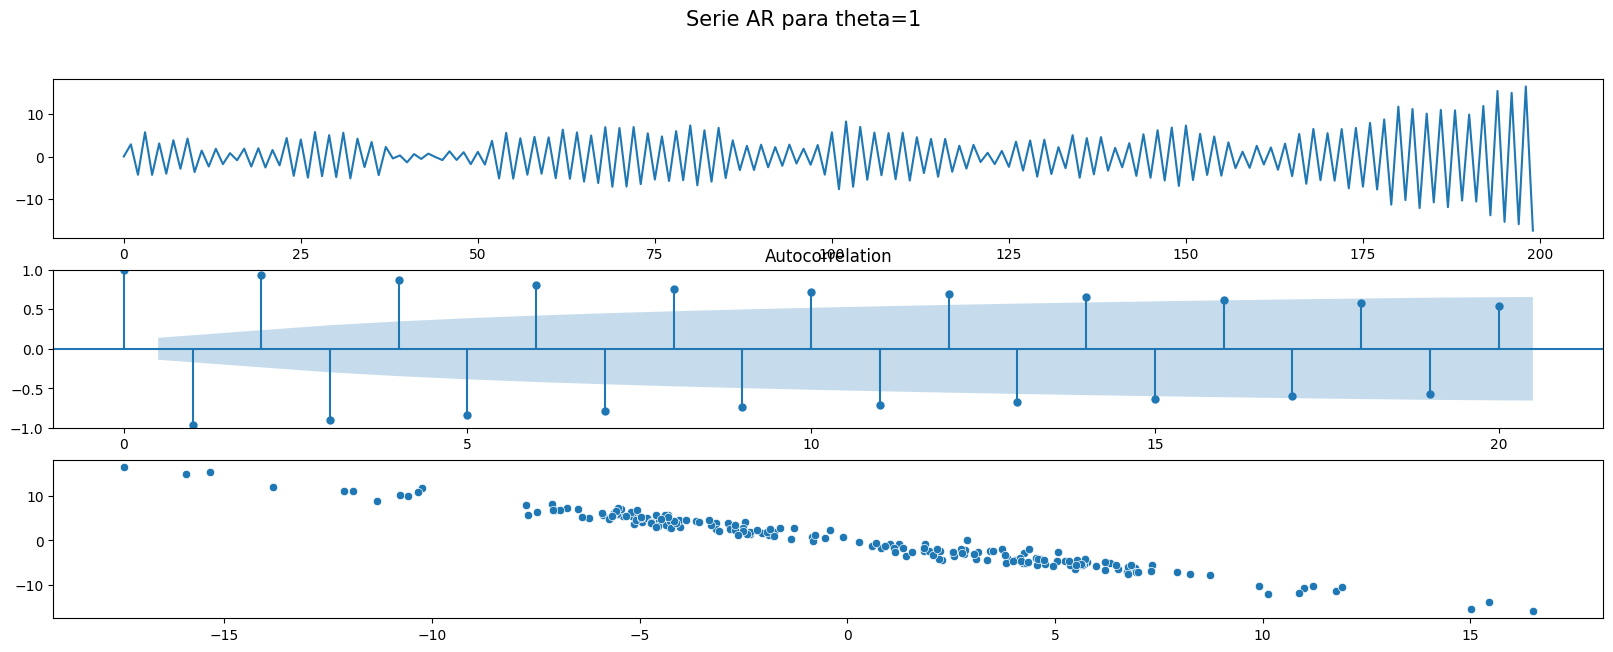

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

thetas = [0.2,0.5,0.9,0.99,1]
for theta in thetas:
    fig, ax =plt.subplots(nrows=3,figsize=(20,7))
    ar1 = np.array([1, theta])
    ma1 = np.array([1])
    AR_object1 = ArmaProcess(ar1, ma1)
    simulated_data_1 = AR_object1.generate_sample(nsample=200)
    sns.lineplot(simulated_data_1,ax=ax[0])
    plot_acf(simulated_data_1, lags = 20,ax=ax[1])
    sns.scatterplot(y=simulated_data_1[:-1],x=simulated_data_1[1:],ax=ax[2])
    fig.suptitle(f'Serie AR para theta={theta}',size=15) 
    plt.show()

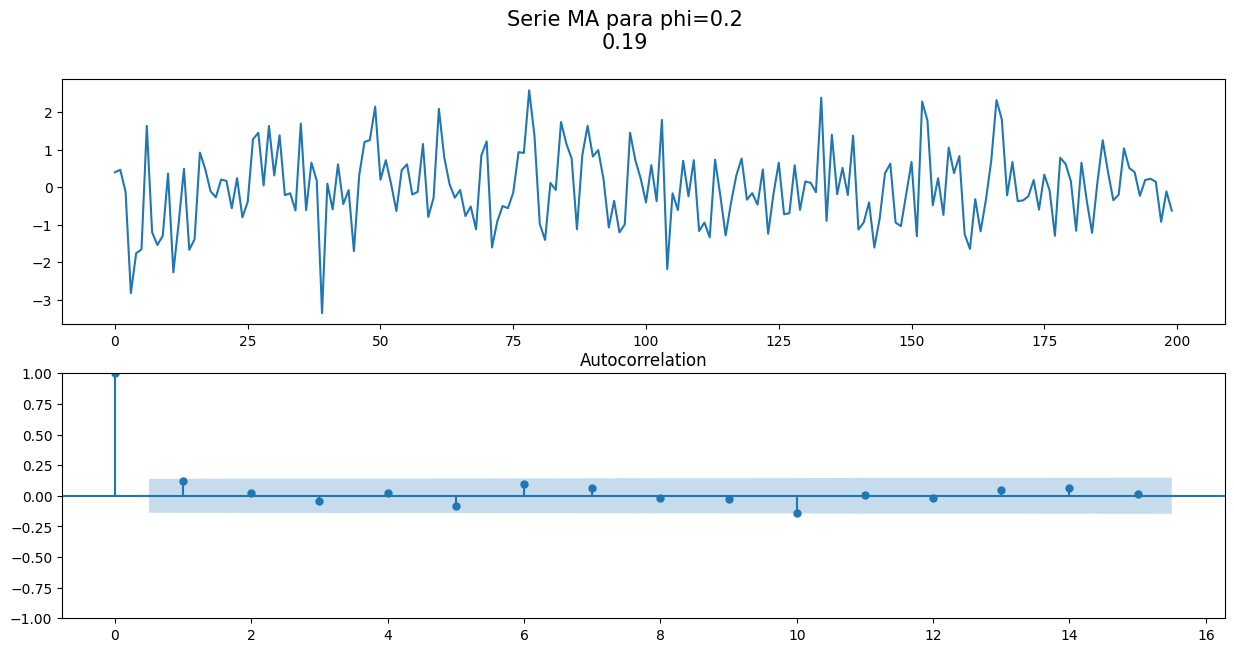

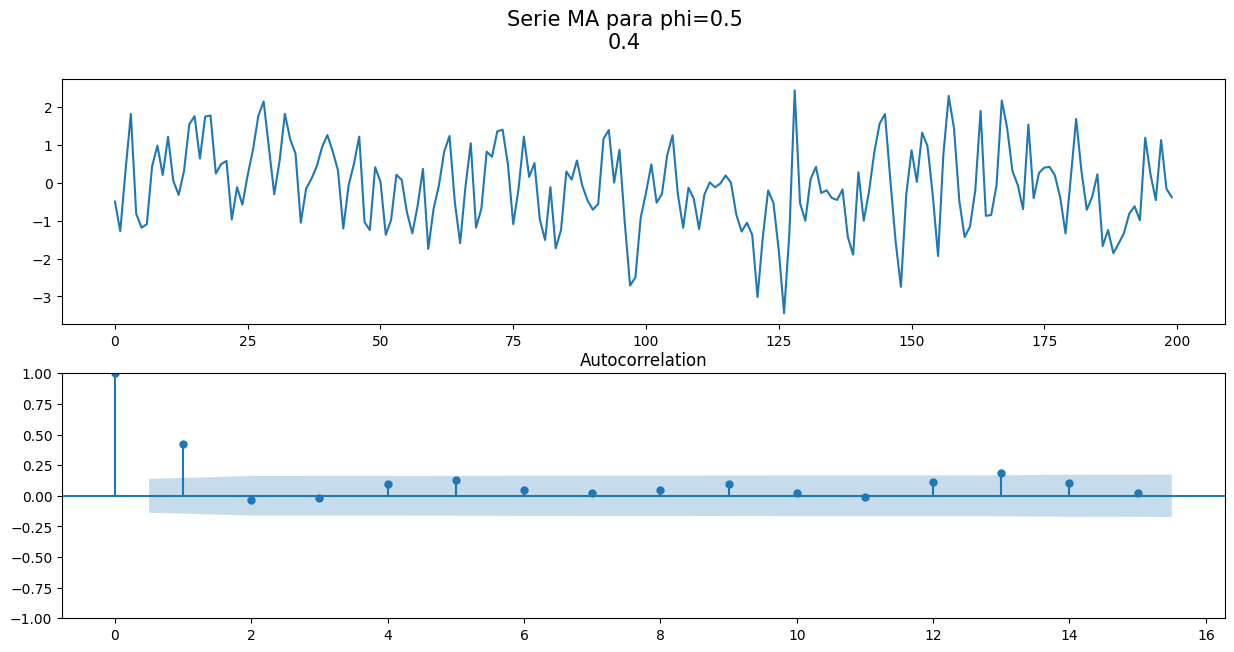

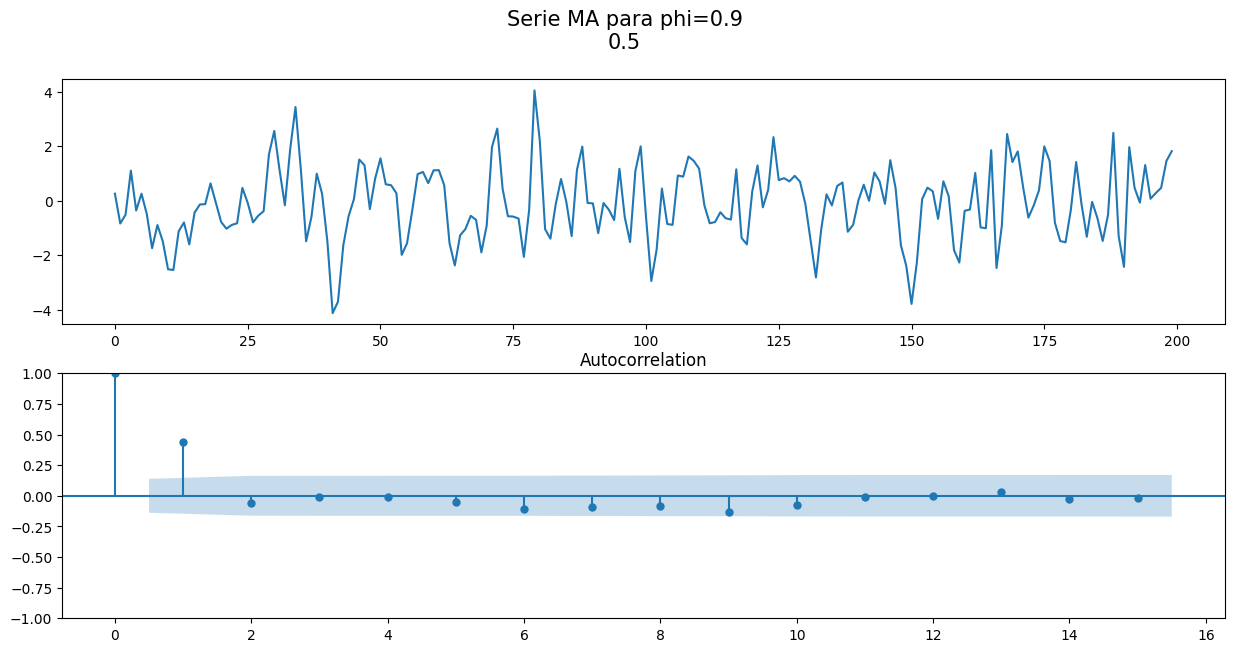

In [27]:
phis = [0.2,0.5,0.9]
for phi in phis:
    fig, ax =plt.subplots(nrows=2,figsize=(15,7))
    ar2 = np.array([1])
    ma2 = np.array([1,phi])
    AR_object2 = ArmaProcess(ar2, ma2)
    simulated_data_2 = AR_object2.generate_sample(nsample=200)
    sns.lineplot(simulated_data_2,ax=ax[0])
    plot_acf(simulated_data_2, lags = 15,ax=ax[1])
    rho=np.round(phi/(1+phi**2),2)
    fig.suptitle(f'Serie MA para phi={phi}\n{rho}',size=15) 
    plt.show()

In [28]:
0.2**30

1.0737418240000018e-21

In [29]:
0.9**30

0.04239115827521624

# Series

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import os

In [10]:
air = pd.read_csv(os.path.join('data','airline-passengers.csv'))
air.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


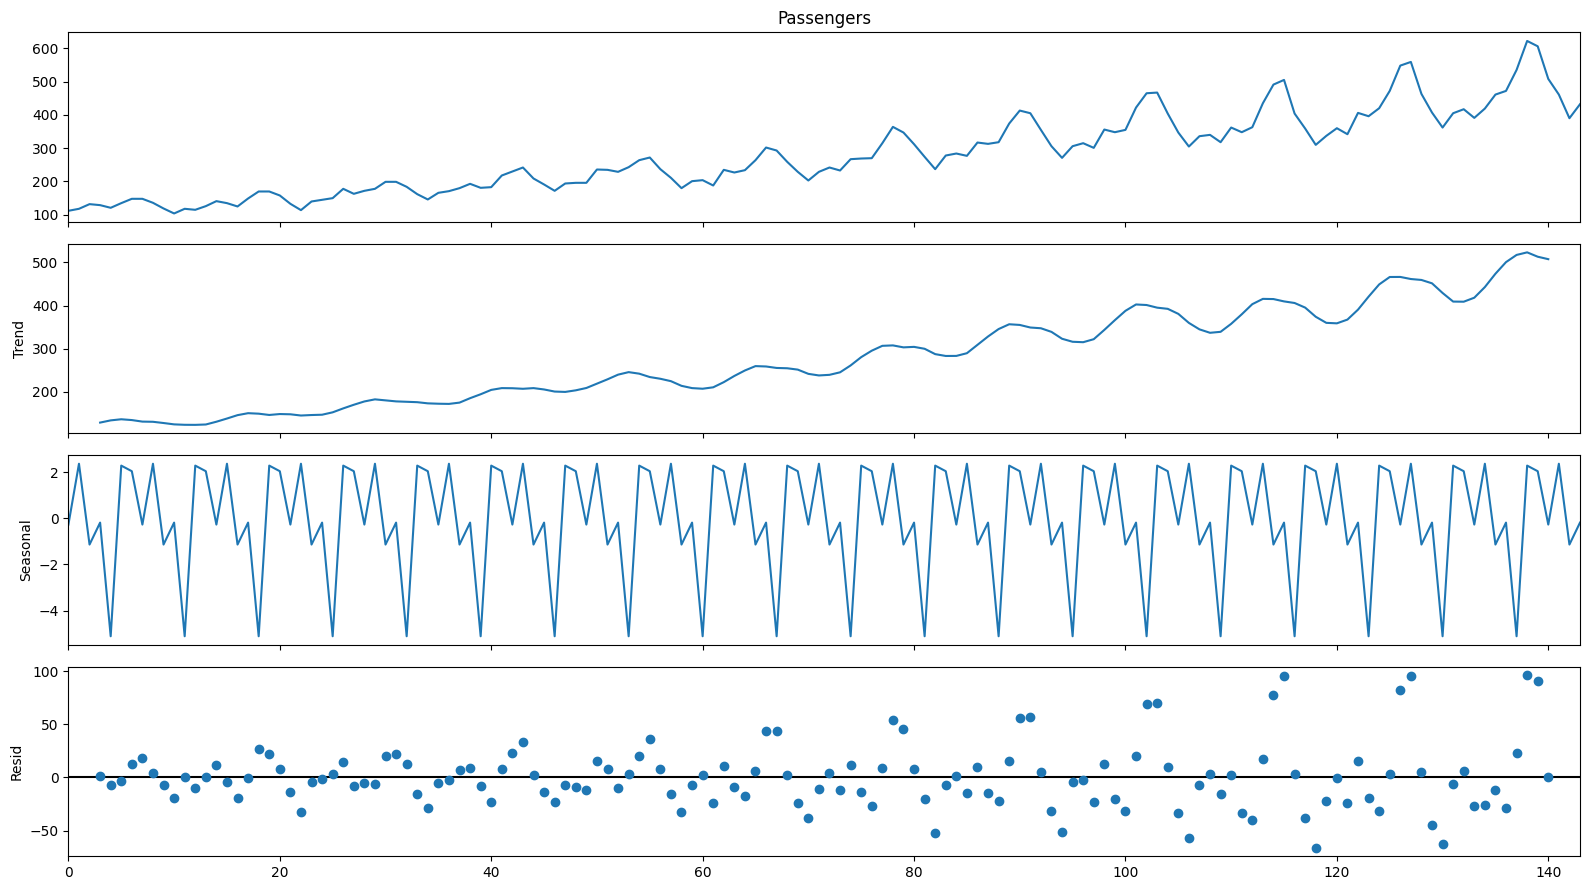

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(x=air['Passengers'],period=7)
fig = decomp.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Ej

1. Ver por ejemplo https://rpubs.com/Meca/386432 y reproducirlo en R.
2. Generar una muestra de tama˜no 200 de un modelo ARMA(2, 1) con ϕ1 = 0.8, ϕ2 = 0.3, θ1 = 0.9. Estimar los par´ametros usando R.
3. Generar datos de un modelo AR(2) con ϕ1 = 0.8, ϕ2 = 0.1 y un modelo ARMA(1, 1) con ϕ1 = 0.8, θ1 = 0.2 de tama˜no 300. Comparar los gr´aficos de las series obtenidas.

## 2)

In [93]:
import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(12345)

arparams = np.array([0.8, 0.1])
maparams = np.array([0.9])

arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 300
y = arma_generate_sample(arparams, maparams, nobs)

arma_mod = ARIMA(y, order=(2, 0, 1), trend="n")
arma_res = arma_mod.fit()

print(arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -424.314
Date:                Wed, 12 Jul 2023   AIC                            856.628
Time:                        19:59:12   BIC                            871.443
Sample:                             0   HQIC                           862.557
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8669      0.069     12.615      0.000       0.732       1.002
ar.L2          0.0419      0.072      0.583      0.560      -0.099       0.183
ma.L1          0.8808      0.034     25.794      0.0

## 3)

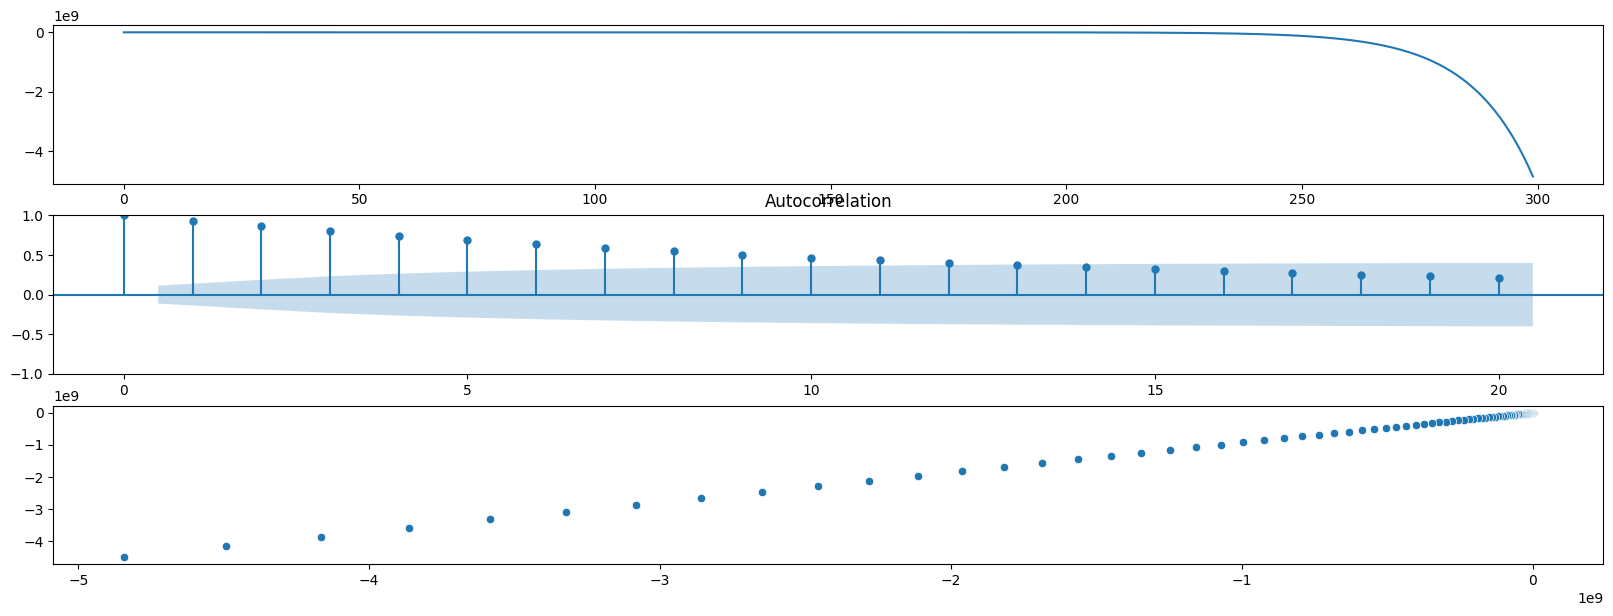

In [92]:
import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(12345)

arparams = np.array([0.8, 0.1])
maparams = np.array([0.9])

arparams = np.r_[1, -arparams]
maparams = np.r_[1, maparams]
nobs = 300
y = arma_generate_sample(arparams, maparams, nobs)

arma_mod = ARIMA(y, order=(2, 0, 1), trend="n")
arma_res = arma_mod.fit()

print(arma_res.summary())